# **23.01.04 K vs avarage phase velocity**

In [2]:
from TO_sim.Sol_Kuramoto import *
from TO_sim.gen_Distribution import *
import matplotlib.pyplot as plt
import numpy as np

from tqdm.notebook import tqdm
import pandas as pd

from TO_sim.To_Draw import Draw_theoretical_wData as DD
from TO_sim.Hysteresis_Kuramoto import Hysteresis_pd_init_pvel as Hp
from TO_sim.Utility import *
import parmap

In [3]:
DF = 'Review/23.01.04 K vs avarage phase velocity/K = 0.01'
Create_Folder(DF)

In [4]:
N = 500
dist = 'Quantile Normal'
t_end = 200
ss = 14
N = 500
dK = 0.01
dt = 0.1
m = 6
applys = [1]
save = True
ms = [6]
Draw_ = DD(m=m,dist = 'Normal')
df_sets = {}
rdf_sets = {}

for m in ms:
    df,rdf = Hp(m,N=N,t_end=t_end,dist = dist,dt = 0.1,dK=dK, shuffle = True, shuffle_seed = ss+1,Init_dtheta=False,Init_dtheta_seed=applys, seed=10)
    df_sets[m] = df
    rdf_sets[m] = rdf

  0%|          | 0/1241 [00:00<?, ?it/s]

  0%|          | 0/1241 [00:00<?, ?it/s]

In [10]:
N = 500
dist = 'Quantile Normal'
t_end = 200
ss = 14
N = 500
dK = 0.01
dt = 0.1
m = 6
applys = [1]
save = True
ms = [6]
Draw_ = DD(m=m,dist = 'Normal')
df_sets = {}
rdf_sets = {}

# for m in ms:
for df,rdf in parmap.map(Hp,ms,N=N,t_end=t_end,dist = dist,dt = 0.1,dK=dK, shuffle = True, shuffle_seed = ss+1,Init_dtheta=False,Init_dtheta_seed=applys, seed=10,\
                         pm_processes=3,pm_pbar=True):
    # df,rdf = Hp(m,N=N,t_end=t_end,dist = dist,dt = 0.1,dK=dK, shuffle = True, shuffle_seed = ss+1,Init_dtheta=False,Init_dtheta_seed=applys, seed=10)
    df_sets[m] = df
    rdf_sets[m] = rdf

Exception in thread Thread-36 (_handle_results):
Traceback (most recent call last):
  File "c:\Users\kim9y\AppData\Local\Programs\Python\Python311\Lib\threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "c:\Users\kim9y\AppData\Local\Programs\Python\Python311\Lib\threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\kim9y\AppData\Local\Programs\Python\Python311\Lib\multiprocessing\pool.py", line 579, in _handle_results
    task = get()
           ^^^^^
  File "c:\Users\kim9y\AppData\Local\Programs\Python\Python311\Lib\multiprocessing\connection.py", line 249, in recv
    buf = self._recv_bytes()
          ^^^^^^^^^^^^^^^^^^
  File "c:\Users\kim9y\AppData\Local\Programs\Python\Python311\Lib\multiprocessing\connection.py", line 317, in _recv_bytes
    return self._get_more_data(ov, maxsize)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kim9y\AppData\Local\Programs\Python\Python311\Lib\multiprocessing\connection.py", l

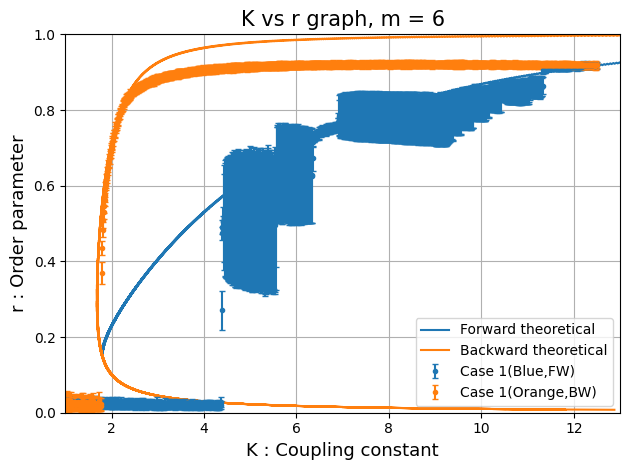

In [5]:
ST = 50
Ks = df.index
Ksr = rdf.index
for m in ms:
    df = df_sets[m]
    rdf = rdf_sets[m]
    plt.figure(facecolor='white')
    data_rs = [np.mean(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_std = [np.std(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rrs = [np.mean(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rstd = [np.std(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    Draw_ = DD(m=m,dist = 'normal')
    Draw_.total()

    plt.errorbar(Ks,data_rs,data_std,fmt='.',color='tab:blue',capsize=2,label='Case 1(Blue,FW)')
    plt.errorbar(Ksr,data_rrs,data_rstd,fmt='.',color='tab:Orange',capsize=2,label='Case 1(Orange,BW)')

    # plt.plot(Ks,data_rs,'.',label=r"$Forward$",markersize=6,color = 'Tab:Blue',)
    # plt.plot(Ksr,data_rrs,'.',label=r"$Backward$",markersize=6,color = 'Tab:Orange',)
    plt.legend()  
    plt.title(f'K vs r graph, m = {m}',fontsize= 15)
    plt.grid()

    plt.xlim(1,13)
    plt.ylim(0,1)

    plt.xlabel('K : Coupling constant',fontsize=13)
    plt.ylabel('r : Order parameter',fontsize=13)
    plt.tight_layout()
    # plt.savefig(DF+f'{dist},m = {m}, K vs r graph.png',dpi=400)

In [6]:

Ks = df.index
Ksr = rdf.index

In [7]:
m = 6
df = df_sets[m]

In [8]:
def temp_func(x):
    temp = x[-200:,:]
    result = np.mean(temp,axis=0)
    return result

In [9]:
temp = rdf.dtheta_s.apply(temp_func)

In [10]:
A = np.array(temp.to_list())

In [11]:
omega = df.iloc[0].Omega

In [12]:
# N_omega = (omega-np.min(omega))/(np.max(omega)-np.min(omega))
N_omega = (omega+3)/(6)

(-6.0, 6.0)

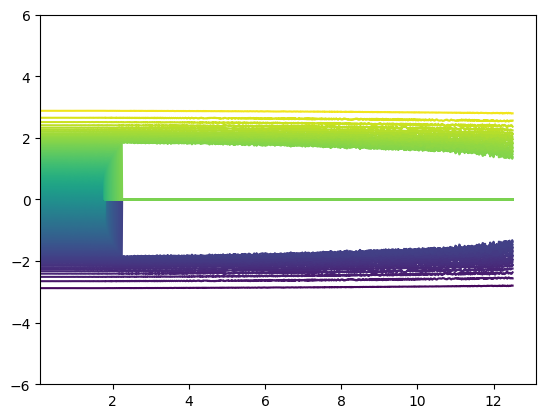

In [13]:
color = plt.cm.viridis(N_omega)
for i,mean_pv in enumerate(A.T):
    plt.plot(Ksr,mean_pv,color = color[i]);
plt.xlim(0.1)
plt.ylim(-6,6)

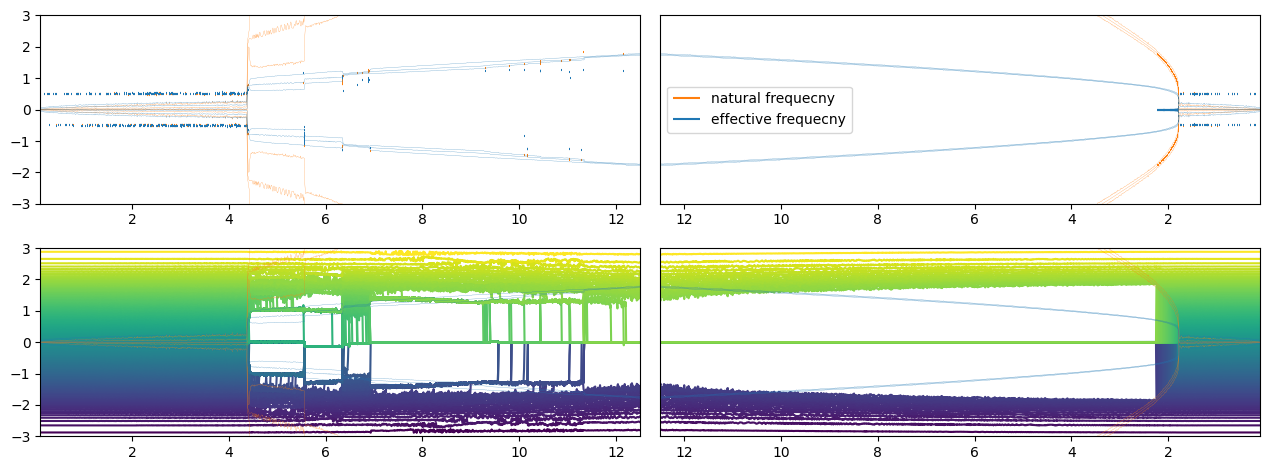

In [18]:
Ks = df.index
Ksr = rdf.index
m = 6
df = df_sets[m]
rdf = rdf_sets[m]
def temp_func(x):
    temp = x[-200:,:]
    result = np.mean(temp,axis=0)
    return result

def omega_DP(df,m):
    Ks = df.index
    O_D,O_P = [],[]
    d_mean,d_min,d_max = [],[],[]
    p_mean,p_min,p_max = [],[],[]
    def mmm(temp,x):
        mean_,min_,max_ = np.mean(temp),np.min(x),np.max(x)
        return np.array([mean_,min_,max_])
    for K in Ks:
        x = df.loc[K].rs
        temp = x[-200:]
        omega_D = mmm(temp,x)*K
        omega_P = (4 / np.pi) * np.sqrt(omega_D / m)
        O_D.append(omega_D)
        O_P.append(omega_P)
    O_D,O_P = map(np.array,[O_D,O_P])
    return O_D,O_P
ODf,OPf = omega_DP(df,m)
ODr,OPr = omega_DP(rdf,m)
ODf[:,1].shape
temp_df = df.dtheta_s.apply(temp_func)
temp_rdf = rdf.dtheta_s.apply(temp_func)
A = np.array(temp_df.to_list())
B = np.array(temp_rdf.to_list())
omega = df.iloc[0].Omega
N_omega = (omega-np.min(omega))/(np.max(omega)-np.min(omega))
fig = plt.figure(figsize=(12.8,4.8))
plt.subplot(221)
for i in range(len(A)-1):
    temp1 = np.where(np.abs(A[i])>0.5)
    temp2 = np.where(np.abs(A[i+1])<0.5)
    A_ = np.intersect1d(temp1,temp2)
    plt.hlines(omega[A_],[Ks[i]],[Ks[i+1]],color='tab:orange')
    plt.hlines(A[i][A_],[Ks[i]],[Ks[i+1]],color='tab:blue')
    # print(A[i][A_])
plt.plot(Ks,ODf,color='tab:orange',alpha=0.8,lw=0.2)
plt.plot(Ks,-ODf,color='tab:orange',alpha=0.8,lw=0.2)
plt.plot(Ks,OPf,color='tab:blue',alpha=0.8,lw=0.2)
plt.plot(Ks,-OPf,color='tab:blue',alpha=0.8,lw=0.2)
# plt.vlines(Ks,[-3],[3],color='black',alpha=0.5,lw=0.1)
plt.xlim(0.1,12.5)
plt.ylim(-3,3)

plt.subplot(222)
for i in range(len(B)-1):
    temp1 = np.where(np.abs(B[i])<0.5)
    temp2 = np.where(np.abs(B[i+1])>0.5)
    A_ = np.intersect1d(temp1,temp2)
    plt.hlines(omega[A_],[Ksr[i]],[Ksr[i+1]],color='tab:orange')
    plt.hlines(B[i][A_],[Ksr[i]],[Ksr[i+1]],color='tab:blue')
    # print(A[i][A_])

plt.yticks([]) 
plt.plot(Ksr,ODr,color='tab:orange',alpha=0.8,lw=0.2)
plt.plot(Ksr,-ODr,color='tab:orange',alpha=0.8,lw=0.2)
plt.plot(Ksr,OPr,color='tab:blue',alpha=0.8,lw=0.2)
plt.plot(Ksr,-OPr,color='tab:blue',alpha=0.8,lw=0.2)
# plt.vlines(Ks,[-3],[3],color='black',alpha=0.5,lw=0.1)
plt.ylim(-3,3)
plt.legend(['natural frequecny','effective frequecny'])
plt.xlim(12.5,0.1)
plt.ylim(-3,3)
plt.tight_layout()


#######
color = plt.cm.viridis(N_omega)
# fig = plt.figure(figsize=(12.8,4.8))
plt.subplot(223)
for i,mean_pv in enumerate(A.T):
    plt.plot(Ks,mean_pv,color = color[i]);
plt.plot(Ks,ODf,color='tab:orange',alpha=0.8,lw=0.2)
plt.plot(Ks,-ODf,color='tab:orange',alpha=0.8,lw=0.2)
plt.plot(Ks,OPf,color='tab:blue',alpha=0.8,lw=0.2)
plt.plot(Ks,-OPf,color='tab:blue',alpha=0.8,lw=0.2)
# plt.vlines(Ks,[-3],[3],color='black',alpha=0.5,lw=0.1)
plt.xlim(0.1,12.5)
plt.ylim(-3.,3.)

plt.subplot(224)
ax2 = plt.gca()
plt.yticks([]) 
for i,mean_pv in enumerate(B.T):
    ax2.plot(Ksr,mean_pv,color = color[i]);
# plt.vlines(Ksr,[-3],[3],color='black',alpha=0.5,lw=0.1)
plt.plot(Ksr,ODr,color='tab:orange',alpha=0.8,lw=0.2)
plt.plot(Ksr,-ODr,color='tab:orange',alpha=0.8,lw=0.2)
plt.plot(Ksr,OPr,color='tab:blue',alpha=0.8,lw=0.2)
plt.plot(Ksr,-OPr,color='tab:blue',alpha=0.8,lsw=0.2)
ax2.invert_xaxis()
plt.xlim(12.5,0.1)
plt.ylim(-3.,3.)
plt.tight_layout()
plt.savefig(DF+'temp.png',dpi=400)